<h1> Proyecto Api: En busca de los mejores superhéroes del universo<h1>

In [1]:
import numpy as np
import requests
import json
import pandas as pd
from pprint import pprint
from time import sleep
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
import re
from datetime import datetime

In [2]:


df = pd.read_csv("Data/heroes_data.csv")

In [3]:
df.head()

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Etnia,Altura,Peso,Color_Ojos,Color_Pelo,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,6,Absorbing Man,38,80,25,100,98,64,Male,Human,193 cm,122 kg,Blue,No Hair,Carl Creel,"Greithoth, ""Crusher"" Creel, Rocky Davis, Dynam...","New York City, New York","Daredevil #1 (April, 1964) (As Rocky Davis)",Marvel Comics,bad
1,20,Amazo,63,100,83,100,100,100,Male,Android,257 cm,173 kg,Red,-,NaN,"Professor Ivos Amazing Android, Timazo, Humazo...",-,"Brave and the Bold #30 (July, 1960)",DC Comics,bad
2,10,Agent Bob,10,8,13,5,5,20,Male,Human,178 cm,81 kg,Brown,Brown,Bob,"Bob, agent of Hydra, Bob, agent of A.I.M",-,"Cable & Deadpool #38 (May, 2007)",Marvel Comics,good
3,3,Abin Sur,50,90,53,64,99,65,Male,Ungaran,185 cm,90 kg,Blue,No Hair,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
4,12,Air-Walker,50,85,100,85,100,40,Male,NaN,188 cm,108 kg,Blue,White,Gabriel Lan,-,"Xandar, a planet in the Tranta system, Androme...",Fantastic Four #120,Marvel Comics,bad


<h4>1 - Capitulo 1: Dentro de todo el universo existen muchos superhéroes y superheroínas, ¿Que descubriremos a lo largo de esta historia que vamos a contar? ¿Descubriremos cúal es el superhéroe más poderoso? Para ello vamos a analizar las 3 habilidades clave de potencia, velocidad y poder de combate. ¿Quienes serán estos seres tan poderosos que gobernarán todo el universo de los comics? ¡Ayudadme a juntar un equipo de los mejores!<h4>

In [4]:
def limpiar_columnas(x):
    if x is None:
        return np.nan
    if x == "Sin dato":
        return np.nan
    try:
        return float(x)
    except:
        return np.nan

df["Inteligencia"] = df["Inteligencia"].map(limpiar_columnas)
df["Fuerza"] = df["Fuerza"].map(limpiar_columnas)
df["Velocidad"] = df["Velocidad"].map(limpiar_columnas)
df["Potencia"] = df["Potencia"].map(limpiar_columnas)
df["Combate"] = df["Combate"].map(limpiar_columnas)
df["Durabilidad"] = df["Durabilidad"].map(limpiar_columnas)

df1 = df

In [5]:
df1 = df1.drop(["ID","Genero","Altura","Peso","Nombre Completo", "Alias", "Lugar de nacimiento" , "Primera aparición" , "Editor", "Alineación", "Color_Ojos", "Color_Pelo", "Etnia"], axis=1)

* Nos quedamos con las columnas que vamos a analizar en este capítulo para descubrir quién es el más poderoso de este universo.

In [6]:
df1.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
0,Absorbing Man,38.0,80.0,25.0,100.0,98.0,64.0
1,Amazo,63.0,100.0,83.0,100.0,100.0,100.0
2,Agent Bob,10.0,8.0,13.0,5.0,5.0,20.0
3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0
4,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0


In [7]:
potencia_max = df1["Potencia"].max() #Super heroe con potencia
df_max_potencia = df1[df1["Potencia"] == potencia_max]

velocidad_max = df1["Velocidad"].max() #Super heroe con velocidad 
df_max_velocidad = df1[df1["Velocidad"] == velocidad_max]

combate_max = df1["Combate"].max() #Super heroe con combate 
df_max_combate = df1[df1["Combate"] == combate_max]

df_max_val = df1[ #Super heroes que tiene las máximas 3 habilidades 
    (df1["Potencia"] >= 100) &
    (df1["Velocidad"] >= 100) &
    (df1["Combate"] >= 100.0)
]

- Aquí tenemos a los 5 superhéroes con más potencia, vemos que hay muchos empatados en el máximo de potencia posible... la lucha por el poder va a ser difícil.

In [8]:
df_max_potencia.head() 

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
1,Amazo,63.0,100.0,83.0,100.0,100.0,100.0
4,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0
5,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0
7,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0
13,Alan Scott,63.0,80.0,23.0,90.0,100.0,32.0


- Los superhéroes más rápidos del universo... Tenemos a un superhéroe que repite respecto al anterior top 5. ¿Será este nuestro ganador?. Seguimos averigüando

In [9]:
df_max_velocidad.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
4,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0
40,Ardina,63.0,100.0,100.0,80.0,100.0,25.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
88,Bizarro,38.0,95.0,100.0,100.0,100.0,85.0
96,Black Bolt,75.0,67.0,100.0,84.0,100.0,56.0


- Vaya! Aqui tenemos a un único ganador, es el único que supera el máximo de poder combate de 100... No es de extrañar que se base en el dios griego de la guerra su personaje.

In [10]:
df_max_combate.head() 

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
41,Ares,75.0,82.0,35.0,80.0,84.0,101.0


- Ahora vamos a ver cuales son los superhéroes que combinando las características que acabamos de ver tienen mejores estadísticas.¸¡Resulta que tenemos empate! Ya no solo empatan en las estadísticas que vimos si no que empatan en todas!

In [11]:
df_max_val

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
429,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0
504,One-Above-All,100.0,100.0,100.0,100.0,100.0,100.0


- Además aqui solo estamos viendo hasta el top 5 de superhéroes pero hemos visto que hay 151 superhéroes que empatan al maximo en potencia y 31 en velocidad!
Pero el líder indiscutible en poder de combate es Ares ya que es el único que rebasa los límites de lo establecido. 

- Si combinamos las estadísticas vemos que tenemos a 2 superhéroes que son los más completos, ¿Quién no querría tenerlos en su equipo para luchar contra el mal?

- Vamos a reclutar a estos superhéroes para nuestro equipo y que sean los estandartes en la batalla:

    - Ares Con su poder de combate será el héroe que sea el primero en la linea de batalla.
    
    - Man of Miracles y One-Above-All serán los que respalden a Ares en la batalla y le ayuden en su batalla contra el mal.

In [12]:
cantidad_potencia = df_max_potencia.shape[0] #Cantidad de superheroes con potencia 100.
cantidad_velocidad = df_max_velocidad.shape[0] #Cantidad de superheroes con velocidad 100.
cantidad_combate = df_max_combate.shape[0] #Cantidad de superheroes con combate 100 o más.
cantidad_max_val = df_max_val.shape[0] #Superheroes con mayor potencia, velocidad y combate.

- Para verlo con más claridad la cantidad de superhéroes que repiten con valores máximos lo vamos a ver en un gráfico

<function matplotlib.pyplot.show(close=None, block=None)>

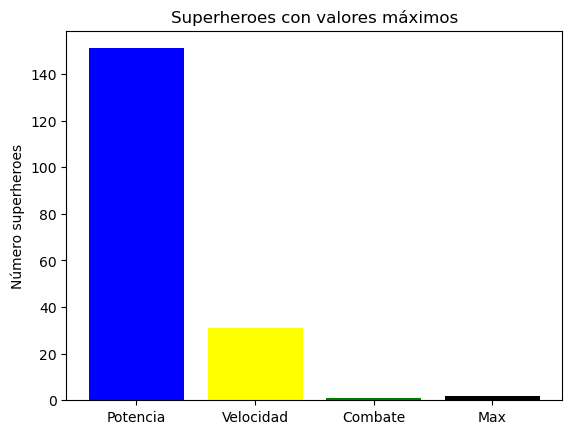

In [13]:
estadisticas = ["Potencia" , "Velocidad" , "Combate" , "Max"]
cantidades = [cantidad_potencia, cantidad_velocidad, cantidad_combate, cantidad_max_val]
colores = ["blue" , "yellow", "green" , "black"]

plt.bar(estadisticas, cantidades, color=colores)
plt.ylabel("Número superheroes")
plt.title("Superheroes con valores máximos")
plt.show

- En este gráfico podemos comparar las habilidades y su relación entre si. 

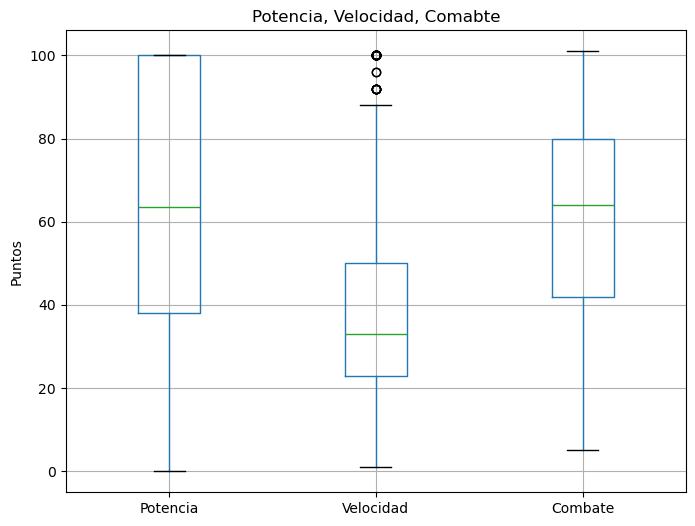

In [14]:
columnas = ["Potencia", "Velocidad", "Combate"]

# Dibujar boxplots
plt.figure(figsize=(8, 6))
df1[columnas].boxplot()
plt.title("Potencia, Velocidad, Comabte")
plt.ylabel("Puntos")
plt.show()

<h4>Capítulo 2: ¿Y si, intentamos buscar al superhéroe que combine la inteligencia y la fuerza? Estas dos estadísticas son claves para defendernos de cualquier enemigo asique vamos a ver a quien podemos buscar para incluirlos en nuestro equipo de superhéroes! Para ello vamos a promediar estas 2 estadísticas.<h4>

In [15]:
inteligencia_max = df1["Inteligencia"].max() #Super heroe más inteligente
df_max_inteligencia = df1[df1["Inteligencia"] == inteligencia_max]

fuerza_max = df1["Fuerza"].max() #Super heroe más fuerte
df_max_fuerza = df1[df1["Fuerza"] == fuerza_max]

menos_inteligente = df1["Inteligencia"].min() #Super heroe menos inteligente
df_menos_inteligente = df1[df1["Inteligencia"] == menos_inteligente]

menos_fuerte = df1["Fuerza"].min()  #Super heroe menos fuerte
df_menos_fuerte = df1[df1["Fuerza"] == menos_fuerte]

df_max_val_2 = df1[
    (df1["Inteligencia"] >= 100) &
    (df1["Fuerza"] >= 100)     
]

- Vamos a ver quienes son los personajes más inteligentes de la galaxia, siempre es importante contar con alguno de estos para nuestro equipo para desarrollar las estrategias de ataque y defensa. Como podemos ver tenemos algunos de los osuperhéroes mas reconocios como Batman o Ant-Man, ¿Con cual de los 2 nos quedaremos en nuestro equipo?

In [16]:
df_max_inteligencia.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
22,Ant-Man,100.0,18.0,23.0,28.0,32.0,32.0
24,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
67,Batman,100.0,26.0,27.0,50.0,47.0,100.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
133,Brainiac,100.0,95.0,63.0,90.0,60.0,75.0


- ¿Y en Fuerza quien será el mas fuerte? Esta estadística será clave en el fragor de la batalla, tenemos muchos candidatos para ello!

In [17]:
df_max_fuerza.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
1,Amazo,63.0,100.0,83.0,100.0,100.0,100.0
6,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0
24,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
27,Anti-Monitor,88.0,100.0,50.0,100.0,100.0,90.0
40,Ardina,63.0,100.0,100.0,80.0,100.0,25.0


- Aunque siempre es importante ver nuestros puntos flacos y tenerlos analizados, cuales son los superhéroes que mas flaquean en este punto... Anda! aqui solo tenemos a un superhéroes con una estadística tan baja...

In [18]:
df_menos_inteligente

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
347,Jack-Jack,6.0,34.0,67.0,80.0,100.0,6.0


- ¿Y en fuerza?¿Quién es el superhéroe mas débil? Muy importante de analizarlo para poder contrarrestarlo en nuestro equipo.

In [19]:
df_menos_fuerte

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
389,Kid Flash,25.0,4.0,92.0,42.0,20.0,30.0
538,Rachel Pirzad,63.0,4.0,8.0,10.0,52.0,10.0


- Vamos a a sacar el top de superhéroes del que tenemos que sacar a los candidatos de nuestro equipo.

In [20]:
df_max_val_2

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
24,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
272,Galactus,100.0,100.0,83.0,100.0,100.0,50.0
407,Living Tribunal,100.0,100.0,100.0,100.0,100.0,30.0
429,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0
504,One-Above-All,100.0,100.0,100.0,100.0,100.0,100.0
516,Phoenix,100.0,100.0,83.0,100.0,100.0,80.0
652,Thanos,100.0,100.0,33.0,100.0,100.0,80.0


- Como podemos ver aparecen 2 Superhéroes que ya hemos seleccionado anteriormente para nuestro equipo. Vamos a elegir a 2 distintos para incluirlos en nuestro equipo de superhéroes!

    - Tenemos a muchos candidatos pero nos vamos a quedar con Phoenix de los X-Men y a Thanos que será de gran valor en nuestro equipo, espero que no siga con su idea de acabar con medio universo como hizo en alguna ocasión....



In [21]:
cantidad_inteligencia = df_max_inteligencia.shape[0] #Cantidad de superheroes con inteligencia 100.
cantidad_fuerza = df_max_fuerza.shape[0] #Cantidad de superheroes con fuerza 100.
cantidad_val_max_fuerza_inteligencia = df_max_val_2.shape[0] #Cantidad de superheroes con inteligencia y fuerza 100.
prom_1_1 = df1.loc[350,["Inteligencia", "Fuerza"]].mean() #Jack-Jack: Promodio más bajo de inteligencia y fuerza.
prom_1_2 = df1.loc[383,["Inteligencia", "Fuerza"]].mean() #Kid Flash: Promodio más bajo de inteligencia y fuerza
prom_1_3 = df1.loc[538,["Inteligencia", "Fuerza"]].mean() #Rachel Pirzad: Promodio más bajo de inteligencia y fuerza.


# Cantidades de superhéroes con valores máximos
categorias_cantidades = ["Inteligencia 100", "Fuerza 100", "Inteligencia y Fuerza 100"]
cantidades = [cantidad_inteligencia, cantidad_fuerza, cantidad_val_max_fuerza_inteligencia]

# Promedios de algunos superhéroes específicos
categorias_promedios = ["Jack-Jack", "Kid Flash", "Rachel Pirzad"]
promedios = [prom_1_1, prom_1_2, prom_1_3]


- En el siguiente gráfico vemos una comparación entre cuantos super heroes tienen inteligencia-fuerza 100 y por separado, entre fuerza e inteligencia.

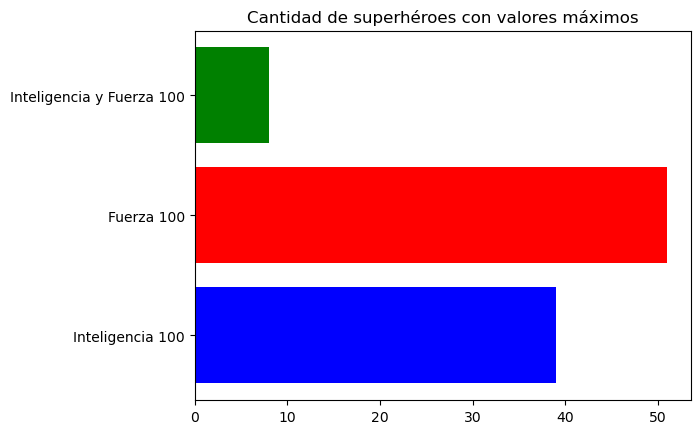

In [22]:
colores_cantidades = ["blue", "red", "green"]

plt.barh(categorias_cantidades, cantidades, color=colores_cantidades)
plt.title("Cantidad de superhéroes con valores máximos")
plt.show()



In [23]:
media_inteligencia = df1["Inteligencia"].mean() #Media de inteligencia de toda la columna
media_fuerza = df1["Fuerza"].mean() #Media de fuerza de toda la columna
media_fuerza_inteligencia = np.mean([media_inteligencia, media_fuerza])
superheroe_mas_inteligente_fuerte = df1.loc[34,["Inteligencia", "Fuerza"]].mean()

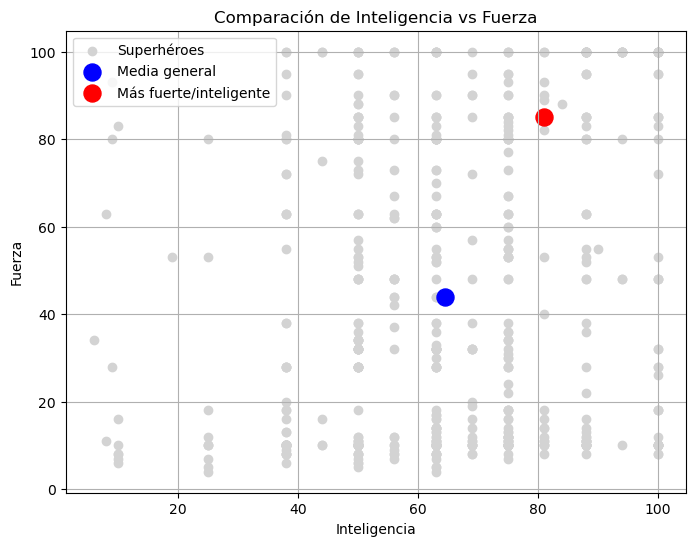

In [24]:
plt.figure(figsize=(8,6))

# Todos los superhéroes
plt.scatter(df1["Inteligencia"], df1["Fuerza"], color="lightgray", label="Superhéroes")

# Media general
plt.scatter(media_inteligencia, media_fuerza, color="blue", s=150, label="Media general")

# Superhéroe más fuerte e inteligente
plt.scatter(df1.loc[34, "Inteligencia"], df1.loc[34, "Fuerza"], color="red", s=150, label="Más fuerte/inteligente")

plt.xlabel("Inteligencia")
plt.ylabel("Fuerza")
plt.title("Comparación de Inteligencia vs Fuerza")
plt.legend()
plt.grid(True)
plt.show()


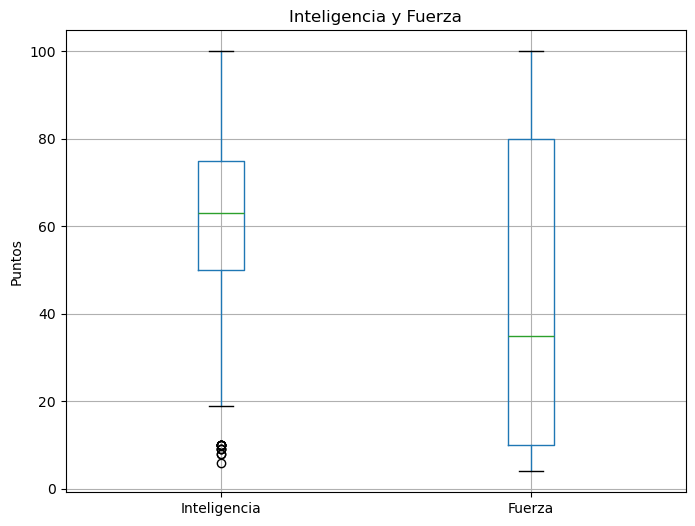

In [25]:
columnas = ["Inteligencia", "Fuerza"]

# Dibujar boxplots
plt.figure(figsize=(8, 6))
df1[columnas].boxplot()
plt.title("Inteligencia y Fuerza")
plt.ylabel("Puntos")
plt.show()

<h4>Capítulo 3 : ¿Y como se distribuyen los personajes por género? Es importante que nuestro equipo sea inclusivo con todos los géneros, y además del género deberiamos de ver todas las etnias que se distribuyen entre los géneros.
¿Afecta el género a el resto de estadísticas? vamos a ver como se relacionan con la estadística de la velocidad. <h4>

In [26]:

df2 = df.drop(["Inteligencia", "Fuerza", "Peso", "Durabilidad", "Potencia", "Combate", "Altura", "Color_Ojos", "Nombre Completo", "Alias", "Lugar de nacimiento", "Primera aparición", "Editor", "Alineación", "Color_Pelo"], axis=1)
df2.head(5)

,ID,Nombre,Velocidad,Genero,Etnia
0,6,Absorbing Man,25.0,Male,Human
1,20,Amazo,83.0,Male,Android
2,10,Agent Bob,13.0,Male,Human
3,3,Abin Sur,53.0,Male,Ungaran
4,12,Air-Walker,100.0,Male,NaN


- Vamos a cambiar los términos por unos que reconozcamos mejor para poder analizarlos con mas claridad.

In [27]:
df2["Genero"] = df2["Genero"].replace({"Male": "Masculino", "Female": "Femenino", "-": "Indeterminado"})
df2

,ID,Nombre,Velocidad,Genero,Etnia
0,6,Absorbing Man,25.0,Masculino,Human
1,20,Amazo,83.0,Masculino,Android
2,10,Agent Bob,13.0,Masculino,Human
3,3,Abin Sur,53.0,Masculino,Ungaran
4,12,Air-Walker,100.0,Masculino,NaN
...,...,...,...,...,...
726,729,Yoda,33.0,Masculino,Yoda's species
727,731,Zoom,100.0,Masculino,NaN
728,728,Ymir,27.0,Masculino,Frost Giant
729,730,Zatanna,23.0,Femenino,Human


-  Vamos a ver como se distribuyen los datos  para poder elegir️ de entre todos los uperhéros un equipo inclusivo♂️

In [28]:
def filtrar_por_genero(df, genero):

    genero = genero.lower()
    return df2[df2["Genero"].str.lower() == genero]


In [29]:
df2_hombres = filtrar_por_genero(df, "Masculino")
df2_hombres.value_counts("Genero")

Genero
Masculino    502
Name: count, dtype: int64

In [30]:
df2_mujeres = filtrar_por_genero(df, "Femenino")
df2_mujeres.value_counts("Genero")


Genero
Femenino    200
Name: count, dtype: int64

In [31]:
df2_indeterminado = filtrar_por_genero(df, "Indeterminado")
df2_indeterminado.value_counts("Genero")

Genero
Indeterminado    29
Name: count, dtype: int64

Sacamos la proporcion de cada uno de los géneros comparandolo con el total de individuos, hay una gran predominancia del género masculino llegando a ser casi el 70% del total. 🧑‍💻

In [32]:
proporciones = df2["Genero"].value_counts(normalize=True)
proporciones

Genero
Masculino        0.686731
Femenino         0.273598
Indeterminado    0.039672
Name: proportion, dtype: float64

Lo graficamos en una gráfica de tarta para poder verlo con más claridad. Observamos que la gran mayoria de superhéroes son de genero masculino. 🍰

<Axes: title={'center': 'Distribución por género'}, ylabel='count'>

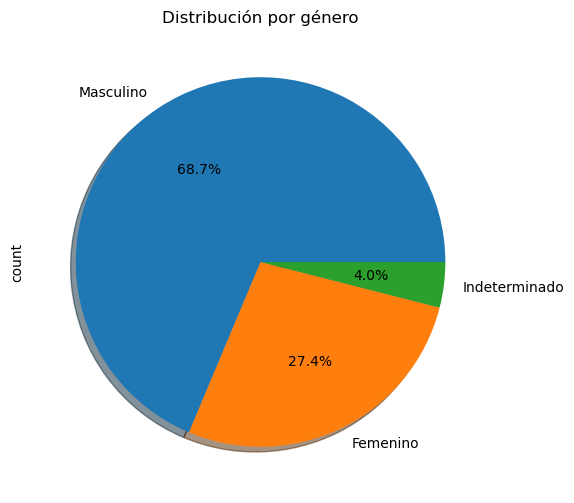

In [33]:
conteo = df2["Genero"].value_counts()

conteo.plot(
    kind="pie",
    autopct="%1.1f%%",
    shadow=True,
    figsize=(6,6),
    title="Distribución por género"
)


Ahora vamos a crear una función para ver cuales son las Etnias mas comunes por cada genero. La Etnia mas predominante en generos como masculino y femenino son los humanos, observamos que el genero que no esta determinado se debe a seres cósmicos. 👽

In [34]:

for genero in ["Masculino", "Femenino", "Indeterminado"]:
    etnia = df2[df2["Genero"] == genero]["Etnia"]
    
    if not etnia.empty:
        etnia_dominante = etnia.mode()[0]
        print(f"Etnia más dominante de {genero}: {etnia_dominante}")
    else:
        print(f"No hay datos de etnia para {genero}")


Etnia más dominante de Masculino: Human
Etnia más dominante de Femenino: Human
Etnia más dominante de Indeterminado: Cosmic Entity


- Vamos a ver como se comportan las etnias dentro de los géneros...

- Umm.. Interesante podemos ver las etnias mas predomintnates en genero masculino y femenino son los humanos y los mutantes que van por debajo, mientras que en las etnias del género indeterminado vemos una batalla reñida entre las Entidades Cosmicas y los Dioses o Eternals.


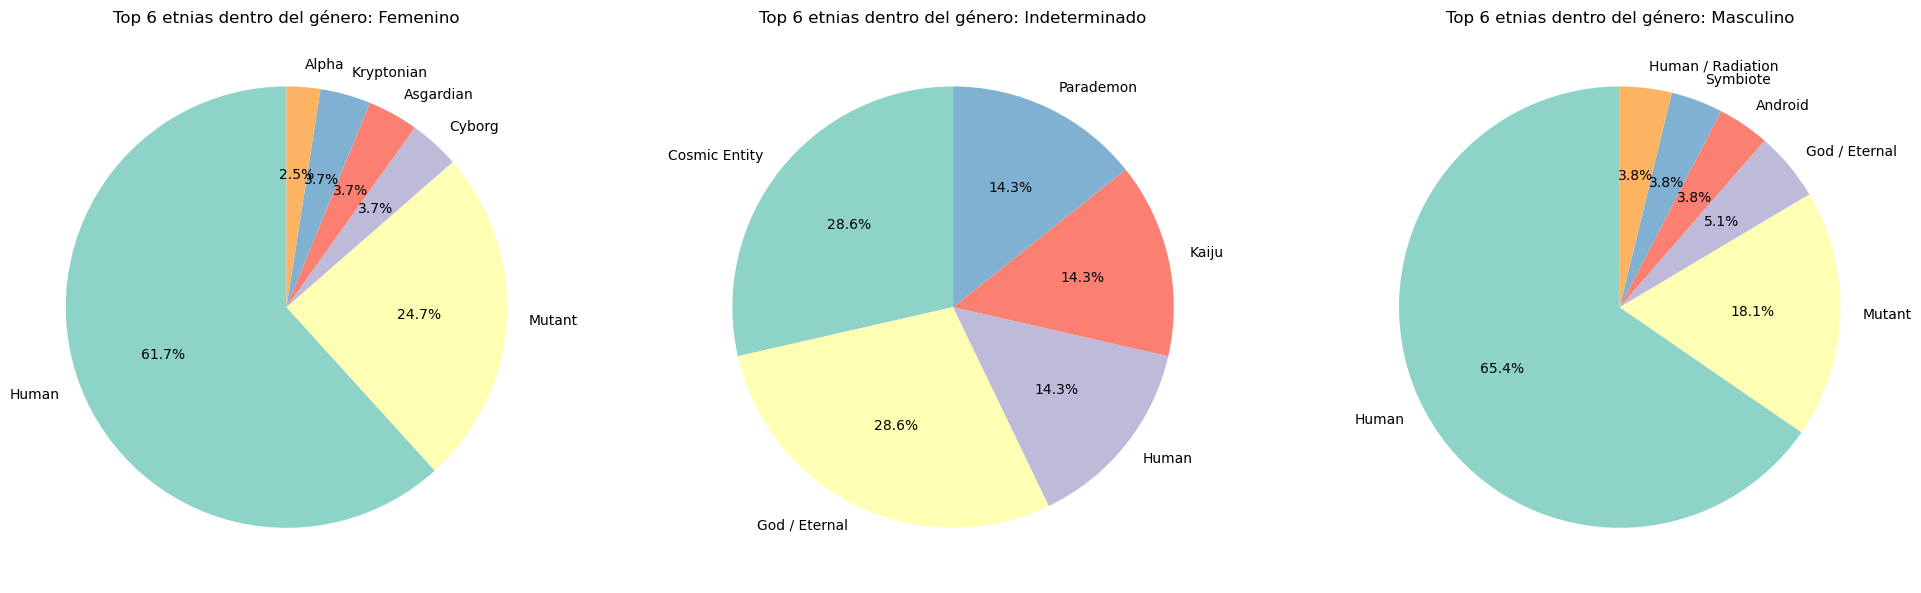

In [35]:
tabla = pd.crosstab(df2["Etnia"], df2["Genero"])


orden_generos = ["Femenino", "Indeterminado", "Masculino"]
tabla = tabla.reindex(columns=orden_generos, fill_value=0)


fig, axes = plt.subplots(1, 3, figsize=(20, 6))


colors = plt.cm.Set3(range(12))

for i, genero in enumerate(orden_generos):

    datos = tabla[genero].sort_values(ascending=False).head(6)


    datos = datos[datos > 0]

    axes[i].pie(
        datos,
        labels=datos.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )
    axes[i].set_title(f"Top 6 etnias dentro del género: {genero}")

plt.tight_layout()
plt.show()

- Vamos a sacar los promedios de velocidad de cada uno de los generos para ver como se comportan. Como vemos los de género Indeterminado son los más rapidos seguidos por el género masculino. ¿Cual escogeremos para nuestro equipo?

In [36]:
# Convertimos velocidad a numérico, los valores que no se puedan convertir se vuelven NaN
df2["Velocidad"] = pd.to_numeric(df2["Velocidad"], errors="coerce")


# Filtramos solo Hombre, Imdeterminado y Mujer y eliminamos valores nulos en velocidad
df2_vel = df2[df2["Genero"].isin(["Masculino", "Femenino", "Indeterminado"]) & df2["Velocidad"].notna()]

# Calculamos la media de velocidad por género
vel_media = df2_vel.groupby("Genero")["Velocidad"].mean()
print("Velocidad media por género:")
print(vel_media)


Velocidad media por género:
Genero
Femenino         37.032680
Indeterminado    49.466667
Masculino        41.138191
Name: Velocidad, dtype: float64


- Graficamos para ver con más claridad la diferencia entre sexos y su velocidad, lo que resulta es que el indeterminado que está mayoritariamente compuesto por Entidades Cósmicas es el más rapido de todos seguido por los hombres. Me parece que ya tenemos ganadores en nuestro equipo...

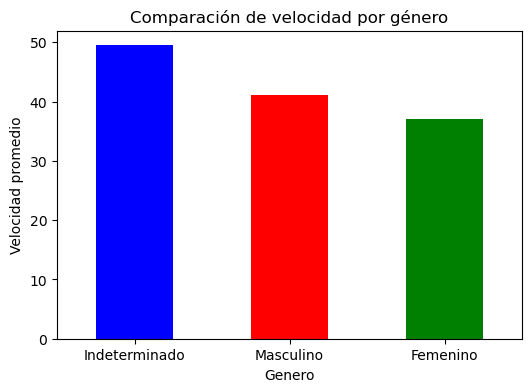

In [37]:

vel_media_ordenada = vel_media.sort_values(ascending=False)
vel_media_ordenada.plot(
    kind="bar", 
    color=["blue", "red", "green"], 
    figsize=(6,4)
)
plt.ylabel("Velocidad promedio")

plt.title("Comparación de velocidad por género")
plt.xticks(rotation=0)
plt.show()


In [38]:
df4 = df.drop(["Nombre Completo", "Alias"], axis=1)

df4["Inteligencia"] = df4["Inteligencia"].map(limpiar_columnas)
df4["Fuerza"] = df4["Fuerza"].map(limpiar_columnas)
df4["Velocidad"] = df4["Velocidad"].map(limpiar_columnas)
df4["Potencia"] = df4["Potencia"].map(limpiar_columnas)
df4["Combate"] = df4["Combate"].map(limpiar_columnas)
df4["Durabilidad"] = df4["Durabilidad"].map(limpiar_columnas)

df5 = df4

df5.head()


,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Etnia,Altura,Peso,Color_Ojos,Color_Pelo,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,6,Absorbing Man,38.0,80.0,25.0,100.0,98.0,64.0,Male,Human,193 cm,122 kg,Blue,No Hair,"New York City, New York","Daredevil #1 (April, 1964) (As Rocky Davis)",Marvel Comics,bad
1,20,Amazo,63.0,100.0,83.0,100.0,100.0,100.0,Male,Android,257 cm,173 kg,Red,-,-,"Brave and the Bold #30 (July, 1960)",DC Comics,bad
2,10,Agent Bob,10.0,8.0,13.0,5.0,5.0,20.0,Male,Human,178 cm,81 kg,Brown,Brown,-,"Cable & Deadpool #38 (May, 2007)",Marvel Comics,good
3,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,Male,Ungaran,185 cm,90 kg,Blue,No Hair,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
4,12,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0,Male,NaN,188 cm,108 kg,Blue,White,"Xandar, a planet in the Tranta system, Androme...",Fantastic Four #120,Marvel Comics,bad


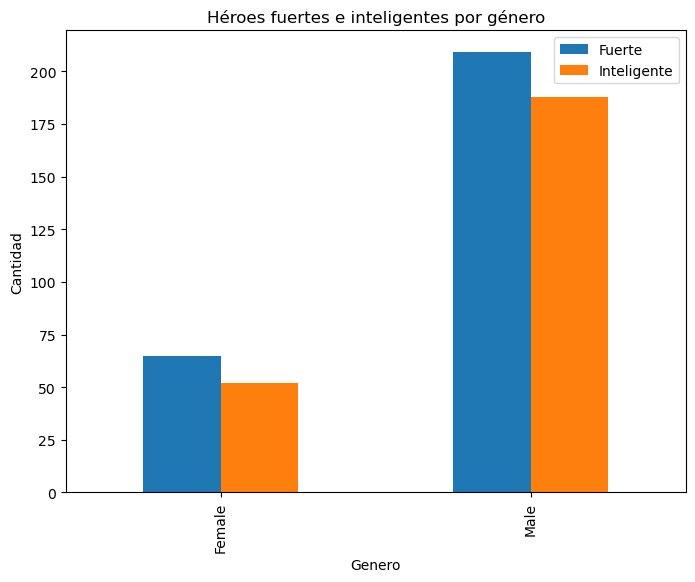

In [39]:
media_fuerza = df5["Fuerza"].mean()
media_inteligencia = df5["Inteligencia"].mean()

df5["Es_fuerte"] = df5["Fuerza"] > media_fuerza
df5["Es_inteligente"] = df5["Inteligencia"] > media_inteligencia

# Limpiar y filtrar géneros
df5["Genero"] = df5["Genero"].str.strip().str.title()
df5 = df5[df5["Genero"] != "-"]

# Conteos
conteo_fuerte = df5.groupby("Genero")["Es_fuerte"].sum()
conteo_inteligente = df5.groupby("Genero")["Es_inteligente"].sum()

# DataFrame para el gráfico
df_genero = pd.DataFrame({
    "Fuerte": conteo_fuerte,
    "Inteligente": conteo_inteligente
})

# Gráfico
df_genero.plot(kind="bar", figsize=(8,6))
plt.title("Héroes fuertes e inteligentes por género")
plt.ylabel("Cantidad")
plt.show()




- En este último gráfico vemos como está distribuido entre generos los personajes fuertes e inteligentes, claro como la mayoria de personajes son masculinos estos pesan mucho más...

<h4>Capítulo 4: Vamos a buscar los superhéroes con las características fisicas mas extremas, tanto el mas alto que nos ayude a llegar donde no podría nadie llegar como los mas bajitos que se cuelen en cualquier sitio. ¿Estará esto relacionado con su peso? Averigüemoslo<h4>

In [40]:

df3 = df.drop(["Inteligencia", "Fuerza", "Velocidad", "Durabilidad", "Potencia", "Combate", "Genero", "Etnia", "Color_Ojos", "Alias", "Lugar de nacimiento", "Primera aparición", "Editor", "Alineación", "Color_Pelo"], axis=1)
df3.head(5)

,ID,Nombre,Altura,Peso,Nombre Completo
0,6,Absorbing Man,193 cm,122 kg,Carl Creel
1,20,Amazo,257 cm,173 kg,NaN
2,10,Agent Bob,178 cm,81 kg,Bob
3,3,Abin Sur,185 cm,90 kg,NaN
4,12,Air-Walker,188 cm,108 kg,Gabriel Lan


Limpiar datos de Nans y pasar los datos a Float para poder trabajarlo despúes tenemos que quitar los cm y los kg 🧹

In [41]:

def limpiar_datos(df3):
    df3 = df3.copy()

    
    def limpiar_peso(valor):
        v = str(valor).lower().strip()
        v = v.replace("kg", "").replace(",", "").strip()

        try:
            f = float(v)
            if f == 0:      
                return np.nan
            return f
        except:
            return np.nan

    
    def limpiar_altura(valor):
        v = str(valor).lower().strip()
        v = v.replace("cm", "").replace(",", "").strip()

        try:
            f = float(v)
            if f == 0:
                return np.nan
            return f
        except:
            return np.nan

    
    df3["Peso"] = df3["Peso"].apply(limpiar_peso)
    df3["Altura"] = df3["Altura"].apply(limpiar_altura)

    return df3


In [42]:
df4 = limpiar_datos(df3)
df4.head(3)

,ID,Nombre,Altura,Peso,Nombre Completo
0,6,Absorbing Man,193.0,122.0,Carl Creel
1,20,Amazo,257.0,173.0,NaN
2,10,Agent Bob,178.0,81.0,Bob


- Vamos a ver los top 3 de estos Superhéroes para que nos sea mas sencillo elegir entre ellos. ¡Ayudadme a elegir!



In [43]:

def top3_superheroes(df):
   
    df_validos = df.dropna(subset=["Altura", "Peso"]).reset_index(drop=True)

    top_altos = df_validos.nlargest(3, "Altura")[["Nombre", "Altura"]]
    top_bajos = df_validos.nsmallest(3, "Altura")[["Nombre", "Altura"]]
    top_pesados = df_validos.nlargest(3, "Peso")[["Nombre", "Peso"]]
    top_ligeros = df_validos.nsmallest(3, "Peso")[["Nombre", "Peso"]]

    return top_altos, top_bajos, top_pesados, top_ligeros


- ¡Vaya! Que diferencias tenemos entre ellos, entre el mas alto MODOK y el más bajo Krypto hay 300 cm de diferencia!

- Y si nos fijamos en el peso Sasquatch pesa 922 Kg mientras que Jack-Jack apenas llega a los 14 Kg

In [44]:
altos, bajos, pesados, ligeros = top3_superheroes(df4)

altos["NombreAltura"] = altos["Nombre"] + " " + altos["Altura"].astype(str) + " cm"
bajos["NombreAltura"] = bajos["Nombre"] + " " + bajos["Altura"].astype(str) + " cm"
pesados["NombrePeso"] = pesados["Nombre"] + " " + pesados["Peso"].astype(str) + " kg"
ligeros["NombrePeso"] = ligeros["Nombre"] + " " + ligeros["Peso"].astype(str) + " kg"

tabla = pd.DataFrame({
    "Más altos": altos["NombreAltura"].tolist(),
    "Más bajos": bajos["NombreAltura"].tolist(),
    "Más pesados": pesados["NombrePeso"].tolist(),
    "Más ligeros": ligeros["NombrePeso"].tolist()
})

print(tabla.to_string(index=False, col_space=25))


                Más altos                 Más bajos               Más pesados               Más ligeros
           MODOK 366.0 cm            Krypto 64.0 cm        Sasquatch 900.0 kg         Jack-Jack 14.0 kg
       Wolfsbane 366.0 cm              Yoda 66.0 cm       Juggernaut 855.0 kg              Yoda 17.0 kg
       Onslaught 305.0 cm         Jack-Jack 71.0 cm         Darkseid 817.0 kg   Howard the Duck 18.0 kg


- Vamos a aplicar una Correlacion para ver como influye el peso en la altura a ver que podemos sacar en limpio. ¿Tendrá que ver que cuanto mas alto mas pese el superhéroe?

- Hacemos la correlacion de Pearson entre altura y peso para ver cuanto de fuerte es , nos da una correlacion moderada, graficamos para verlo más claro, el resultado nos arroja una correlacion de 0.68, la cual es considerada una correlacion moderada tirando a fuerte. 💪

In [45]:

df_validos = df4.dropna(subset=["Peso", "Altura"])


correlacion = df_validos["Peso"].corr(df_validos["Altura"])
print("Correlación entre peso y altura:", correlacion)


Correlación entre peso y altura: 0.6880633787390174


- En la gráfica vemos que la correlacion se vuelve moderada por que hay varios valores muy fuera de rango que rompen la correlación ya que como vemos donde tenemos más datos se concentran entre 1,60m y 2m, pero tenemos algunos datos muy dispersos como vemos en 900kg que rompen esa correlación. 

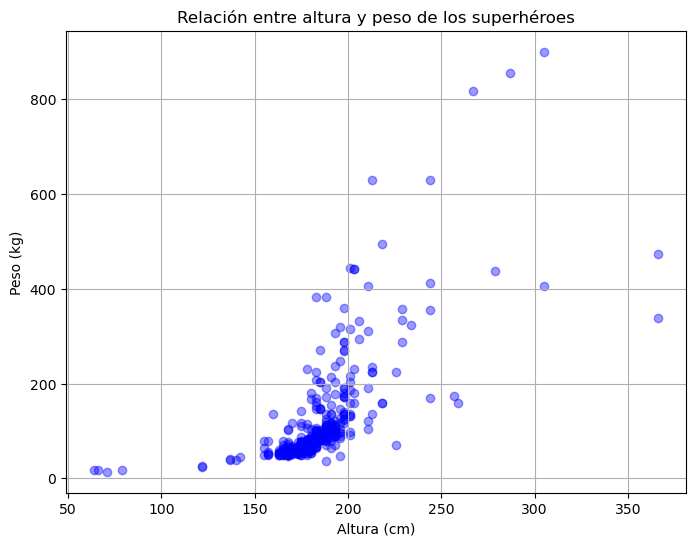

In [46]:

plt.figure(figsize=(8,6))
plt.scatter(df_validos["Altura"], df_validos["Peso"], color="blue", alpha=0.4)
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación entre altura y peso de los superhéroes")
plt.grid(True)
plt.show()


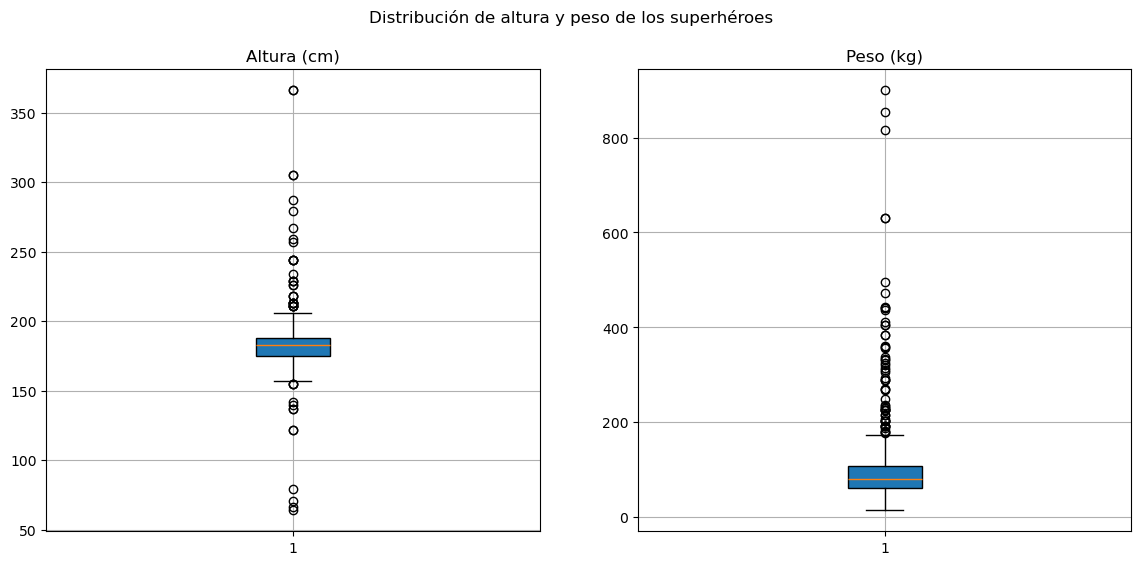

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].boxplot(df_validos["Altura"], patch_artist=True)
axes[0].set_title("Altura (cm)")
axes[0].grid(True)


axes[1].boxplot(df_validos["Peso"], patch_artist=True)
axes[1].set_title("Peso (kg)")
axes[1].grid(True)

plt.suptitle("Distribución de altura y peso de los superhéroes")
plt.show()

- La correlación entre altura y peso es mas fuerte en los datos mas centrales pero se rompen por los outliers que tenemos. Vamos a verlo con un gráfico de cajas a ver si nos ayuda a tenerlo más claro.

/tmp/ipykernel_36741/1514154851.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_validos["Altura"], df_validos["Peso"]],


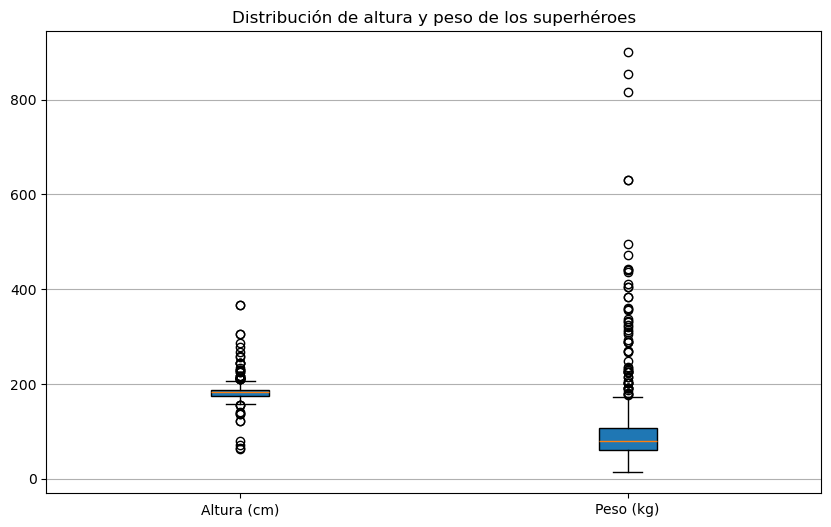

In [48]:
plt.figure(figsize=(10, 6))

plt.boxplot([df_validos["Altura"], df_validos["Peso"]],
            labels=["Altura (cm)", "Peso (kg)"],
            patch_artist=True)

plt.title("Distribución de altura y peso de los superhéroes")
plt.grid(axis="y")
plt.show()

- Vamos a ver si quitando los Outliers que tenemos podemos ver una correlacion más clara centrandonos en los datos mas abundantes para ello creamos la función-

In [49]:
def quitar_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return (col >= limite_inf) & (col <= limite_sup)

# Filtrar outliers en ambas variables
filtro_altura = quitar_outliers(df_validos["Altura"])
filtro_peso = quitar_outliers(df_validos["Peso"])

df_sin_outliers = df_validos[filtro_altura & filtro_peso]

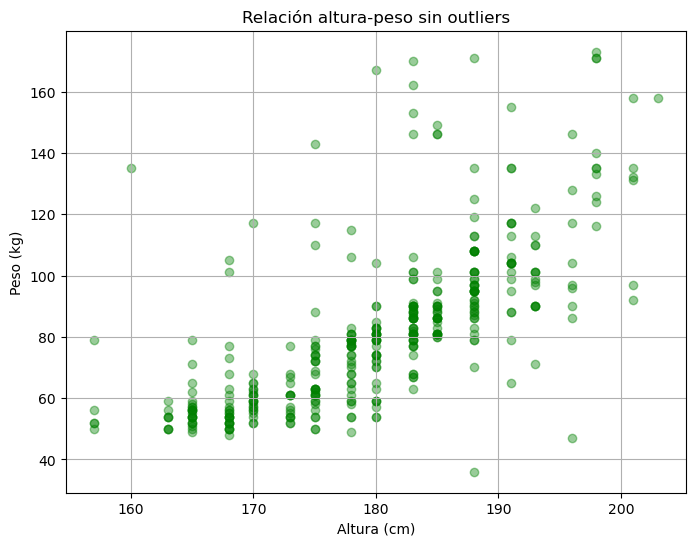

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(df_sin_outliers["Altura"], df_sin_outliers["Peso"], 
            color="green", alpha=0.4)
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación altura-peso sin outliers")
plt.grid(True)
plt.show()

- Pues esto es otra cosa. Aqui si vemos una correlacion mucho más marcada entre el peso y la altura.... Claro hemos tenido que sacar los valores de Sasquatch con sus 900 Kg

<h4>- Capítulo 5 : ¿Y si nos remontamos a los primeros superhéroes que salieron? ¿Y esa primera aparición cual es el Alias y su lugar de nacimiento? Ayudame a descubrirlo y quizás lo metamos en nuestro equipo, ¡debe de tener mucha experiencia en esto!<h4>

In [51]:


def limpiar_y_extraer_año(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()
    
    # Normalizar nombres de columna
    df.columns = df.columns.str.strip()
    
    def extraer_año(texto):
        if pd.isna(texto):
            return np.nan
        coincidencia = re.search(r'\b(19\d{2}|20\d{2})\b', str(texto))
        if coincidencia:
            año = int(coincidencia.group(1))
            if 1900 <= año <= 2025:
                return año
        return np.nan

    df['Año_Aparicion'] = df['Primera aparición'].apply(extraer_año).astype('Int64')
    
    # Reemplazar 'Sin dato' por NaN
    df.replace('Sin dato', np.nan, inplace=True)
    
    return df

def obtener_aparicion_antigua_y_nueva(df: pd.DataFrame) -> tuple[dict, dict]:

    df_años_validos = df.dropna(subset=['Año_Aparicion'])
    
    if df_años_validos.empty:
        return {}, {}
    
    claves = ['Nombre', 'Primera aparición', 'Lugar de nacimiento', 'Alias', 'Año_Aparicion']

    heroe_antiguo = df_años_validos.nsmallest(1, 'Año_Aparicion')[claves].iloc[0].to_dict()
    heroe_nuevo = df_años_validos.nlargest(1, 'Año_Aparicion')[claves].iloc[0].to_dict()
    
    return heroe_antiguo, heroe_nuevo


df_limpio = limpiar_y_extraer_año(df)

heroe_antiguo, heroe_nuevo = obtener_aparicion_antigua_y_nueva(df_limpio)

print("Héroe con aparición más antigua:\n", heroe_antiguo)
print("\nHéroe con aparición más reciente:\n", heroe_nuevo)


Héroe con aparición más antigua:
 {'Nombre': 'King Kong', 'Primera aparición': 'King Kong (1933)', 'Lugar de nacimiento': 'Skull Island', 'Alias': 'the 8th Wonder of the World, King of Skull Island', 'Año_Aparicion': 1933}

Héroe con aparición más reciente:
 {'Nombre': 'K-2SO', 'Primera aparición': 'Rogue One: A Star Wars Story (2016)', 'Lugar de nacimiento': 'Galactic Empire', 'Alias': 'Kaytoo Esso, Kay-Tuesso', 'Año_Aparicion': 2016}


- Vaya el primer superhéroe es nada más ni nada menos que King Kong. ¿Estará a favor de entrar en nuestro equipo? ¿O seguirá reinando sobre todas las bestias de Skull Island? 

- Quizás tengamos más suerte intentando reclutar al superhéroe más nuevo que es K-250 aunque no sé si sigue disponible despúes de lo que pasó en Rogue One

In [52]:
info_antigua, info_nueva = obtener_aparicion_antigua_y_nueva(df_limpio)
df_info_5 = pd.DataFrame({
    "MAS ANTIGUO": info_antigua,
    "MAS NUEVO": info_nueva
})
df_info_5

,MAS ANTIGUO,MAS NUEVO
Nombre,King Kong,K-2SO
Primera aparición,King Kong (1933),Rogue One: A Star Wars Story (2016)
Lugar de nacimiento,Skull Island,Galactic Empire
Alias,"the 8th Wonder of the World, King of Skull Island","Kaytoo Esso, Kay-Tuesso"
Año_Aparicion,1933,2016


- Ahora que estamos investigando esto...¿Desde que año empezaron a aparecer los primer superhéroes?¿ Tu te haces la misma pregunta verdad?

In [53]:


año_actual = datetime.now().year

# Año de aparición del primer superhéroe
año_primero = info_antigua['Año_Aparicion']

# Año de aparición del superhéroe más nuevo
año_nuevo = info_nueva['Año_Aparicion']

# Calcular los años transcurridos desde la aparición
años_desde_primero = año_actual - año_primero

# Si el superhéroe ya apareció
if año_nuevo > año_actual:
    años_hasta_nuevo = año_nuevo - año_actual
    print(f"Han pasado {años_desde_primero} años desde que apareció el primer superhéroe ({info_antigua['Nombre']}).")
    print(f"Faltan {años_hasta_nuevo} años para que aparezca el más nuevo ({info_nueva['Nombre']}).")
else:
    años_desde_nuevo = año_actual - año_nuevo
    print(f"Han pasado {años_desde_primero} años desde que apareció el primer superhéroe ({info_antigua['Nombre']}).")
    print(f"Han pasado {años_desde_nuevo} años desde que apareció el más nuevo ({info_nueva['Nombre']}).")



Han pasado 92 años desde que apareció el primer superhéroe (King Kong).
Han pasado 9 años desde que apareció el más nuevo (K-2SO).


- Vamos a ver si vemos mas claro como es la diferencia de años entre los mas nuevos y mas viejos de los superhéroes además de asi vemos la media, este gráfico nos va a ayudar a ello

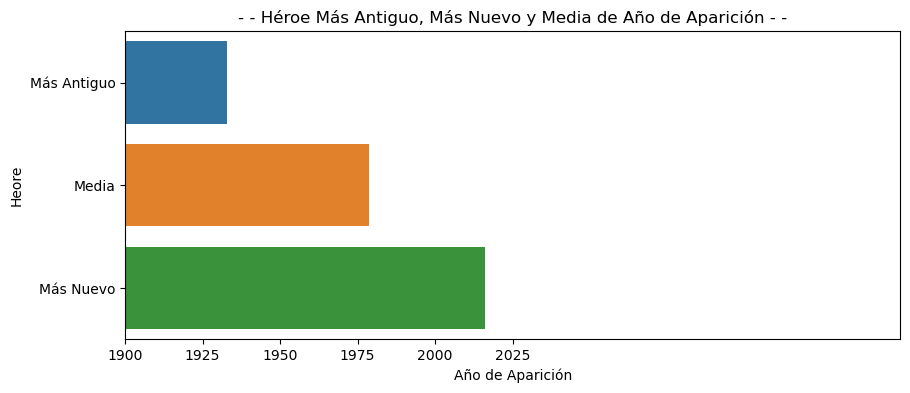

In [54]:
media_aparicion = df_limpio["Año_Aparicion"].mean()

df_grafico = pd.DataFrame({
    "Héroe": ["Más Antiguo", "Media", "Más Nuevo"],
    "Año_Aparicion": [
        info_antigua["Año_Aparicion"],
        media_aparicion,
        info_nueva["Año_Aparicion"]],
    "Nombre": [
        info_antigua["Nombre"],
        "Media General",
        info_nueva["Nombre"]]})



plt.figure(figsize=(10, 4))

sns.barplot(
    x="Año_Aparicion",
    y="Héroe",
    hue="Héroe",
    data=df_grafico,)

plt.title("- - Héroe Más Antiguo, Más Nuevo y Media de Año de Aparición - -")
plt.xlabel("Año de Aparición")
plt.ylabel("Heore")
plt.xlim(1900, 2150)
plt.xticks(range(1900, 2030, 25))

plt.show()

-Capitulo 6: ¡Oye! No hemos caido en si los superhéroes que estamos seleccionando son buenos o malos.. ¿Como podemos arreglar esto? Ayudame por favor!

In [55]:
def contar_alineacion_por_editor(df: pd.DataFrame) -> pd.DataFrame:

    df['Alineación'] = df['Alineación'].replace({np.nan: 'Sin dato', '-': 'Sin dato'})
    
    tabla_conteo = pd.crosstab(df['Editor'], df['Alineación'], dropna=False)
    
    tabla_conteo['Total'] = tabla_conteo.sum(axis=1)
    
    orden_columnas = ['good', 'bad', 'neutral', 'Sin dato', 'Total']
    for col in orden_columnas:
        if col not in tabla_conteo.columns:
            tabla_conteo[col] = 0
            
    return tabla_conteo[orden_columnas]
    
    #crea una tabla con conteos y totales de alineación por editor

def obtener_resumen_alineacion(df_conteo: pd.DataFrame) -> tuple:
    
    total_buenos = df_conteo['good'].sum()
    total_malos = df_conteo['bad'].sum()
    
    # Editor con más 'good'
    editor_mas_buenos = df_conteo['good'].idxmax()
    
    # Editor con más 'bad'
    editor_mas_malos = df_conteo['bad'].idxmax()
    
    return total_buenos, total_malos, editor_mas_buenos, editor_mas_malos
    


- Vamos a ver cuantos son los totales de superhéroes buenos y malos y asi podemos elegir bien a nuestro equipo!

In [56]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)
df_info_6 = pd.DataFrame({
    "SUPERHEROES": ["Total buenos", "Total malos", "TOTAL"],
    "CANTIDAD": [total_buenos, total_malos, total_buenos + total_malos]
})
print("¿Cuantos superheroes buenos y malos existen y el TOTAL?")
df_info_6


¿Cuantos superheroes buenos y malos existen y el TOTAL?


,SUPERHEROES,CANTIDAD
0,Total buenos,494
1,Total malos,206
2,TOTAL,700


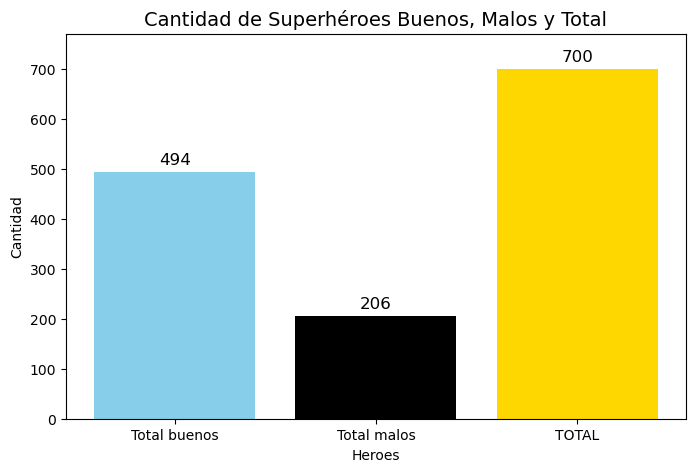

In [57]:
colores = ["skyblue", "black", "gold"] 
plt.figure(figsize=(8,5))
bars = plt.bar(df_info_6["SUPERHEROES"], df_info_6["CANTIDAD"], color=colores)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02*df_info_6["CANTIDAD"].max(),
             int(altura), ha='center', fontsize=12)

plt.title("Cantidad de Superhéroes Buenos, Malos y Total", fontsize=14)
plt.ylabel("Cantidad")
plt.xlabel("Heroes")
plt.ylim(0, df_info_6["CANTIDAD"].max() * 1.1)

plt.show()



- Vaya por suerte hay muchso mas superhéroes buenos que malos... Quizás tengamos suerte y ninguno de los villanos se nos haya colado en nuestro equipo.

- De todas formas vamos a ver que editores son los que tienen mayor porcentajes de heroes buenos y malos.

In [58]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)

df_info_61 = pd.DataFrame({
    "EDITOR CON MAS BUENOS Y MALOS": ["Editor con más buenos", "Editor con más malos"],
    "EDITOR": [editor_mas_buenos, editor_mas_malos]
})

df_info_61

,EDITOR CON MAS BUENOS Y MALOS,EDITOR
0,Editor con más buenos,Marvel Comics
1,Editor con más malos,Marvel Comics


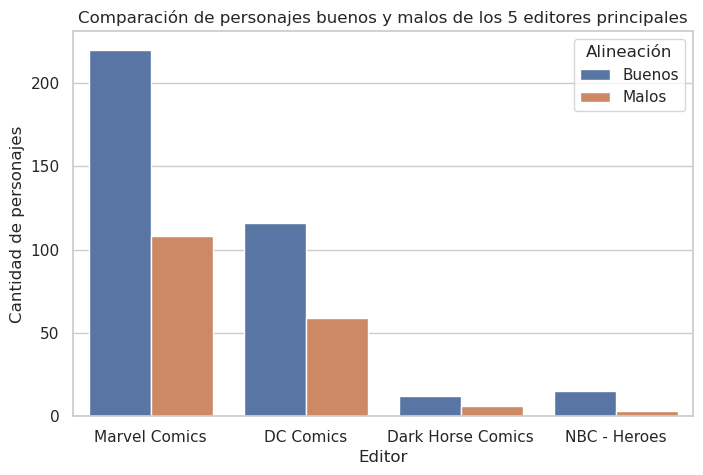

In [59]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)

#tomamos los 5 editores con mas personajes
top5_editores = tabla_alineacion.sort_values('Total', ascending=False).head(5)

#representamos los valores en cada fila con un solo valor 
df_plot = top5_editores[['good', 'bad']].reset_index().melt(
    id_vars='Editor', value_vars=['good', 'bad'],
    var_name='Alineación',
    value_name='Cantidad'
)

# Reemplazamos los valores 'good' y 'bad'
df_plot['Alineación'] = df_plot['Alineación'].replace({'good': 'Buenos', 'bad': 'Malos'})

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

barplot = sns.barplot(
    x='Editor',
    y='Cantidad',
    hue='Alineación',
    data=df_plot,
)

plt.title("Comparación de personajes buenos y malos de los 5 editores principales")
plt.ylabel("Cantidad de personajes")
plt.xlabel("Editor")
plt.legend(title="Alineación")
plt.show()



- Vaya parece que Marvel es el que se lleva la palma en cantidad de superhéroes buenos y malos, solo seguido muy por detrás por DC Comics, las dos grandes editoriales de comics que existen.

- Vamos a ver que correlacion existe buenos y malos en las editoriales top

In [60]:
#correlacion de los 5 mas importantes
df_correlacion = df_limpio.dropna(subset=['Alineación', 'Editor']) #limpiamos para que no tengan datos vacios

conteo_editores = df_correlacion['Editor'].value_counts() # contamos cuantas veces aparecen los editores

top5_editores = conteo_editores.head(5).index.tolist() #tomamos los 5 mejores editores con mas registreos

tabla_contingencia = pd.crosstab(df_correlacion['Editor'], df_correlacion['Alineación']) #Crea una tabla de contingencia  que muestra la frecuencia de cada combinación

tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100 #calculamos el porcentaje por fila

df_editor_alineacion = tabla_contingencia.astype(str) + " (" + tabla_porcentajes.round(1).astype(str) + "%)" #Combinamos conteo y porcentaje en un solo string

df_top5_alineacion = df_editor_alineacion.loc[top5_editores] # selecionamos 5

df_top5_alineacion



Alineación,Sin dato,bad,good,neutral
Editor,,,,
Marvel Comics,1 (0.3%),108 (31.9%),220 (64.9%),10 (2.9%)
DC Comics,1 (0.5%),59 (31.4%),116 (61.7%),12 (6.4%)
Dark Horse Comics,0 (0.0%),6 (33.3%),12 (66.7%),0 (0.0%)
NBC - Heroes,0 (0.0%),3 (16.7%),15 (83.3%),0 (0.0%)
Image Comics,1 (7.1%),11 (78.6%),2 (14.3%),0 (0.0%)


- Según la correlación hecha se ve claramente que Marvel, DC Comics y Dark Horse Comics tienen una correlación mucho mas fuerte entre buenos y malos.

- Pero ahora vamos a ver  como es esta correlación en un gráfico viendo la cantidad de heroes por editorial y cuales son buenos malos y neutrales

In [61]:
df_long = tabla_top5.melt(id_vars="Editor", var_name="Alineación", value_name="Conteo")

NameError: name 'tabla_top5' is not defined

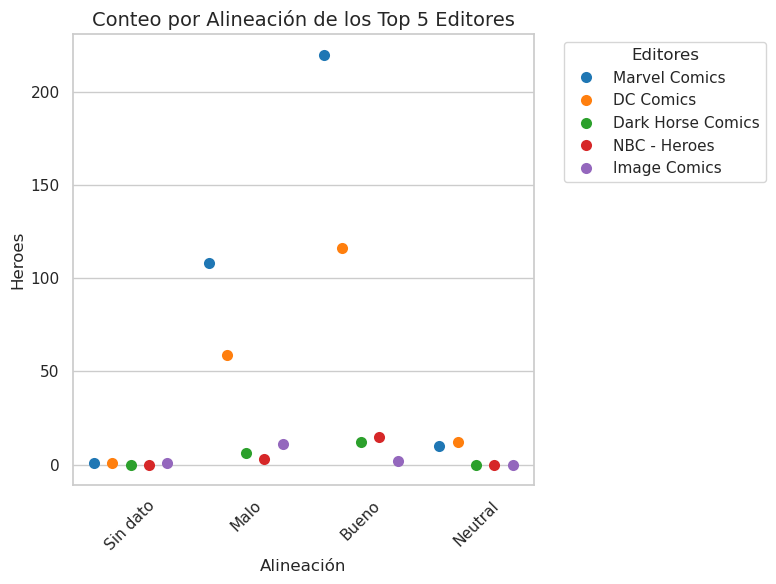

In [ ]:
df_long['Alineación'] = df_long['Alineación'].replace({
    'bad': 'Malo',
    'good': 'Bueno',
    'neutral' : 'Neutral'
})

# Gráfico swarmplot
plt.figure(figsize=(8,6))
sns.swarmplot(
    data=df_long,
    x="Alineación",
    y="Conteo",
    hue="Editor",
    palette=palette,
    size=8,
    dodge=True
)

plt.title("Conteo por Alineación de los Top 5 Editores", fontsize=14)
plt.xlabel("Alineación")
plt.ylabel("Heroes")
plt.xticks(rotation=45)
plt.legend(title="Editores", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()



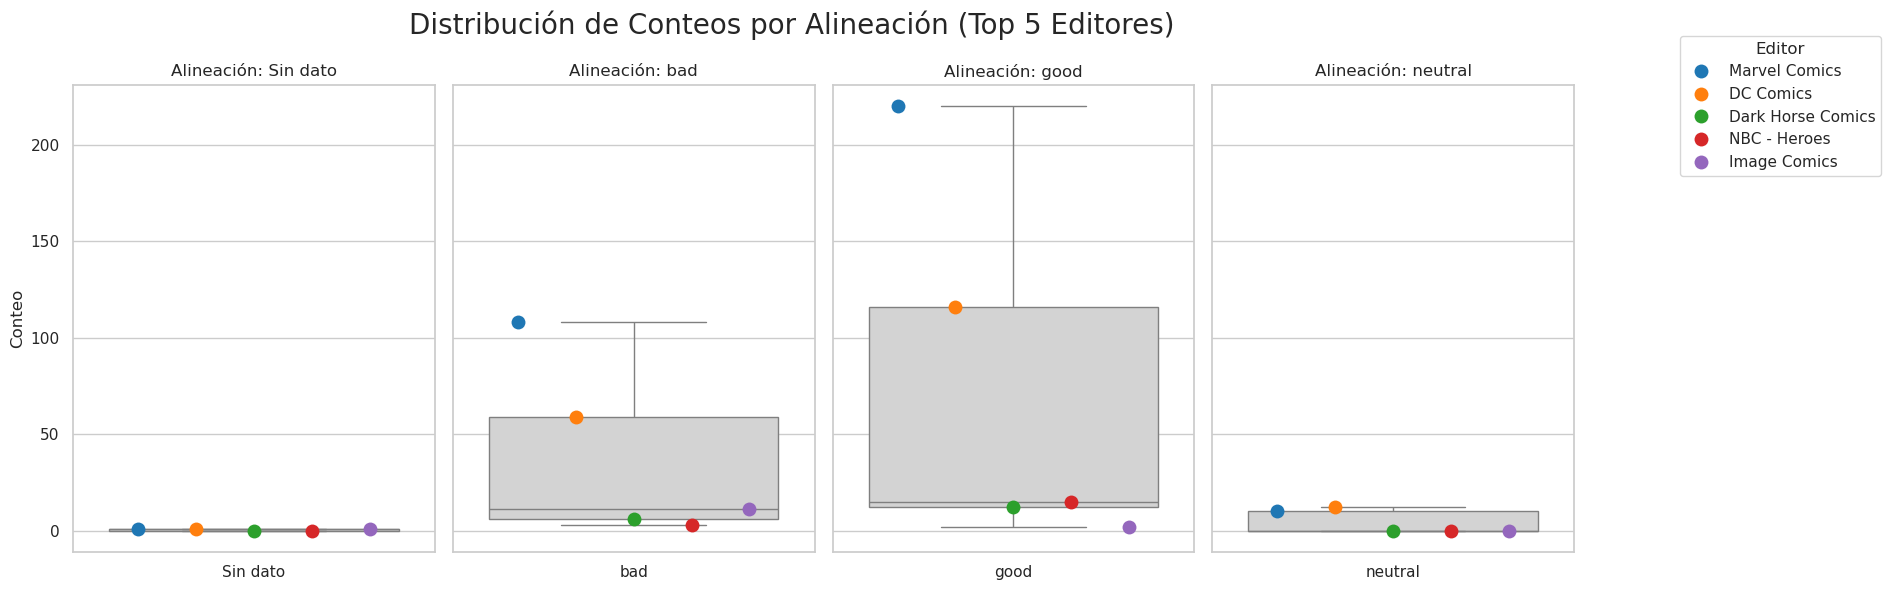

In [62]:
tabla_top5 = tabla_contingencia.loc[top5_editores].reset_index()

tabla_top5.rename(columns={tabla_top5.columns[0]: 'Editor'}, inplace=True)

df_long = tabla_top5.melt(id_vars="Editor", var_name="Alineación", value_name="Conteo")

sns.set(style="whitegrid")
palette = sns.color_palette("tab10", n_colors=len(top5_editores))
categorias = df_long['Alineación'].unique()
num_cat = len(categorias)
fig, axes = plt.subplots(1, num_cat, figsize=(4*num_cat, 6), sharey=True)

for ax, cat in zip(axes, categorias):
    subset = df_long[df_long['Alineación'] == cat]
    
    # Boxplot gris de distribución general
    sns.boxplot(
        data=subset,
        x="Alineación",
        y="Conteo",
        color="lightgray",
        showfliers=False,
        ax=ax
    )
    
    # Swarmplot de puntos individuales por editor
    sns.swarmplot(
        data=subset,
        x="Alineación",
        y="Conteo",
        hue="Editor",
        palette=palette,
        size=10,
        dodge=True,
        ax=ax
    )
    
    ax.set_title(f"Alineación: {cat}")
    ax.set_xlabel("")
    ax.set_ylabel("Conteo")
    ax.legend().remove() #elimanar leyendas repetidas , sino sale en cada grafico

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Editor", bbox_to_anchor=(1.05, 0.95), loc='upper left')

fig.suptitle("Distribución de Conteos por Alineación (Top 5 Editores)", fontsize=20)
plt.tight_layout()
plt.show()


- Como vemos en el último gráfico podemos ver por editorial el numero de superhéroes que son buenos malos o neutrales, como podemos observar la gran mayotía de superhéroes son buenos seguro que hemos tenido suerte al elegirnos y tendremos al mejor equipo posible para defendernos de todos los males que noss acechan en este universo de superhéroes que tenemos creado